In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


In [2]:
df = pd.read_csv("/kaggle/input/spaceship-titanic/train.csv")

# Data Exploration

In [3]:
df.shape

(8693, 14)

In [4]:
df.head(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [5]:
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


# Data Viz

<Axes: xlabel='Transported'>

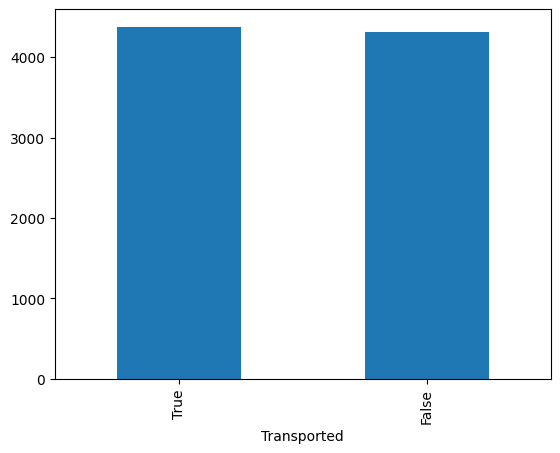

In [7]:
plot_df = df.Transported.value_counts()
plot_df.plot(kind="bar")

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

<Axes: xlabel='VRDeck', ylabel='Count'>

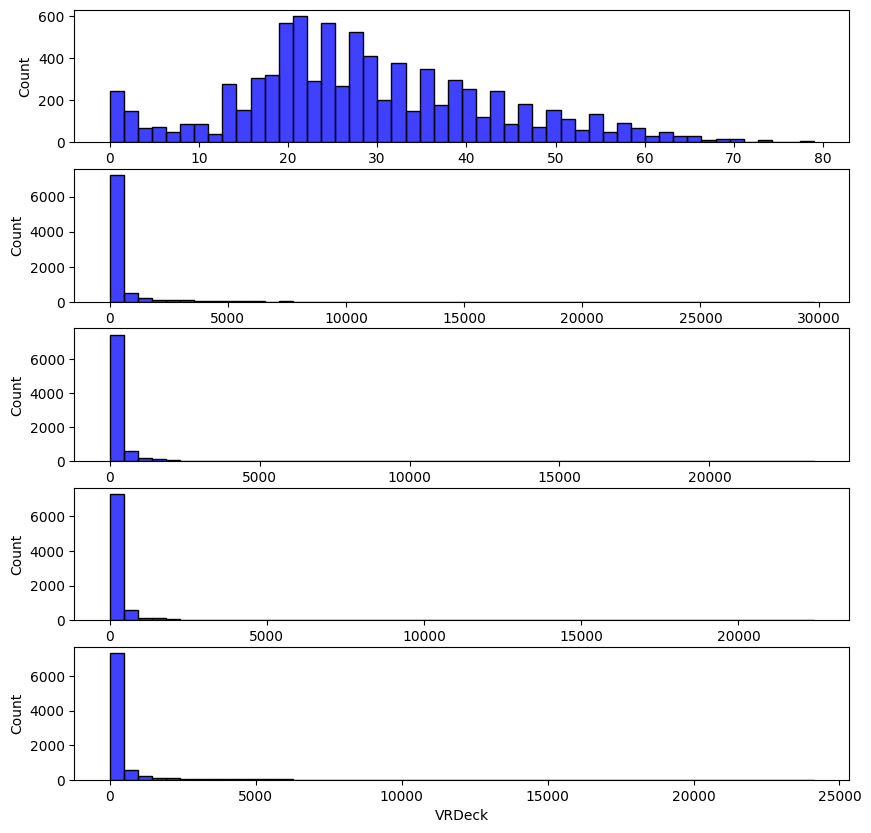

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(5,1, figsize=(10,10))

sns.histplot(df['Age'], color='b', bins=50, ax=ax[0])
sns.histplot(df['FoodCourt'], color='b', bins=50, ax=ax[1])
sns.histplot(df['ShoppingMall'], color='b', bins=50, ax=ax[2])
sns.histplot(df['Spa'], color='b', bins=50, ax=ax[3])
sns.histplot(df['VRDeck'], color='b', bins=50, ax=ax[4])

# Data Prepare

In [12]:
df = df.drop(["PassengerId", "Name"], axis = 1)

KeyError: "['PassengerId', 'Name'] not found in axis"

In [13]:
df.head(5)

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


In [15]:
df.shape

(8693, 12)

In [16]:
df.isnull().sum().sort_values(ascending=False)

CryoSleep       217
ShoppingMall    208
VIP             203
HomePlanet      201
Cabin           199
VRDeck          188
FoodCourt       183
Spa             183
Destination     182
RoomService     181
Age             179
Transported       0
dtype: int64

In [22]:
df[['RoomService','VIP', 'CryoSleep', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']] = df[['RoomService','VIP', 'CryoSleep', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].fillna(value=0)

In [23]:
df.isnull().sum().sort_values(ascending=False)

HomePlanet      201
Cabin           199
Destination     182
Age             179
CryoSleep         0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Transported       0
dtype: int64

In [24]:
label = "Transported"
df[label] = df[label].astype(int)
df[label].head(5)

0    0
1    1
2    0
3    0
4    1
Name: Transported, dtype: int64

In [27]:
df['VIP'] = df['VIP'].astype(int)
df['CryoSleep'] = df['CryoSleep'].astype(int)

In [29]:
df[["Deck","Cabin_num","Side"]] = df["Cabin"].str.split("/",expand=True)

In [32]:
try:
    df=  df.drop('Cabin',axis = 1)
except KeyError:
    print("Field does not exist")

Field does not exist


# Data Split

In [39]:
def split_dataset(dataset, test_ratio = 0.2):
    test_indices = np.random.rand(len(dataset)) < test_ratio
    return dataset[~test_indices], dataset[test_indices]

train_df, valid_df = split_dataset(df,0.2)
print("{} examples in training, {} examples in testing.".format(
    len(train_df), len(valid_df)))

6960 examples in training, 1733 examples in testing.


In [40]:
import tensorflow_decision_forests as tfdf

In [43]:
train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train_df, label=label)
valid_ds = tfdf.keras.pd_dataframe_to_tf_dataset(valid_df, label=label)

# model build

In [44]:
tfdf.keras.get_all_models()

[tensorflow_decision_forests.keras.RandomForestModel,
 tensorflow_decision_forests.keras.GradientBoostedTreesModel,
 tensorflow_decision_forests.keras.CartModel,
 tensorflow_decision_forests.keras.DistributedGradientBoostedTreesModel]

In [46]:
rf = tfdf.keras.RandomForestModel()
rf.compile(metrics=["accuracy"])

Use /tmp/tmpzgxqtw3t as temporary training directory


# Model train

In [47]:
rf.fit(x=train_ds)

Reading training dataset...
Training dataset read in 0:00:04.738568. Found 6960 examples.
Training model...
Model trained in 0:00:51.297297
Compiling model...
Model compiled.


In [51]:
tfdf.model_plotter.plot_model_in_colab(rf, tree_idx=0, max_depth=3)

# Evaluate

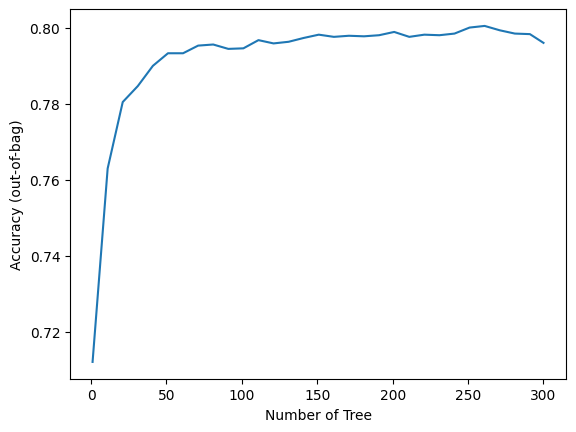

In [53]:
logs = rf.make_inspector().training_logs()
plt.plot([log.num_trees for log in logs], [log.evaluation.accuracy for log in logs])
plt.xlabel("Number of Tree")
plt.ylabel("Accuracy (out-of-bag)")
plt.show()

In [55]:
inspector = rf.make_inspector()
inspector.evaluation()

Evaluation(num_examples=6960, accuracy=0.7959770114942529, loss=0.537301506758226, rmse=None, ndcg=None, aucs=None, auuc=None, qini=None)

In [56]:
evaluation = rf.evaluate(x=valid_ds,return_dict=True)

for name, value in evaluation.items():
    print(f"{name}: {value:.4f}")

2/2 [==============================] - 1s 68ms/step - loss: 0.0000e+00 - accuracy: 0.7957
loss: 0.0000
accuracy: 0.7957


# Variable Importances

In [57]:
for importance in inspector.variable_importances().keys():
    print("\t", importance)

	 SUM_SCORE
	 NUM_AS_ROOT
	 INV_MEAN_MIN_DEPTH
	 NUM_NODES


In [59]:
inspector.variable_importances()['NUM_AS_ROOT']

[("CryoSleep" (1; #2), 128.0),
 ("Spa" (1; #10), 58.0),
 ("RoomService" (1; #7), 56.0),
 ("VRDeck" (1; #12), 32.0),
 ("ShoppingMall" (1; #8), 15.0),
 ("FoodCourt" (1; #5), 8.0),
 ("Deck" (4; #3), 2.0),
 ("HomePlanet" (4; #6), 1.0)]

# Using Another model

In [62]:
tfdf.keras.get_all_models()

[tensorflow_decision_forests.keras.RandomForestModel,
 tensorflow_decision_forests.keras.GradientBoostedTreesModel,
 tensorflow_decision_forests.keras.CartModel,
 tensorflow_decision_forests.keras.DistributedGradientBoostedTreesModel]

In [64]:
gb = tfdf.keras.GradientBoostedTreesModel()
gb.compile(metrics=["accuracy"])

Use /tmp/tmpxysu5lfi as temporary training directory


In [65]:
gb.fit(x=train_ds)

Reading training dataset...
Training dataset read in 0:00:00.313303. Found 6960 examples.
Training model...
Model trained in 0:00:32.018674
Compiling model...
Model compiled.


In [66]:
tfdf.model_plotter.plot_model_in_colab(gb, tree_idx = 0, max_depth=3)

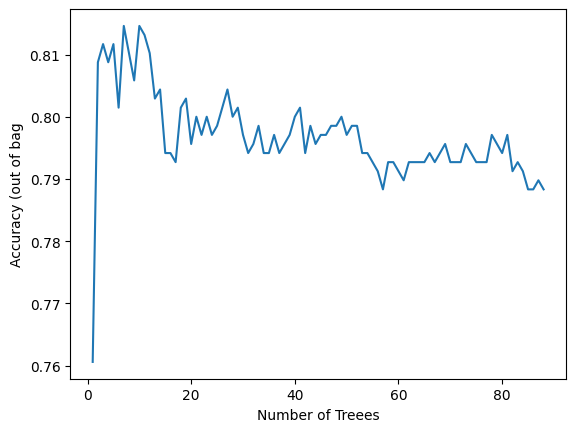

In [69]:
logs = gb.make_inspector().training_logs()
plt.plot([log.num_trees for log in logs], [log.evaluation.accuracy for log in logs])
plt.xlabel("Number of Treees")
plt.ylabel("Accuracy (out of bag")
plt.show()

In [71]:
inspector = gb.make_inspector()
inspector.evaluation()

Evaluation(num_examples=None, accuracy=0.7927007079124451, loss=0.8391900062561035, rmse=None, ndcg=None, aucs=None, auuc=None, qini=None)

In [72]:
evaluation = gb.evaluate(x=valid_ds, return_dict=True)
for name, value in evaluation.items():
    print(f"{name} {value:.4f}")

2/2 [==============================] - 0s 14ms/step - loss: 0.0000e+00 - accuracy: 0.7992
loss 0.0000
accuracy 0.7992


# Test DF

In [73]:
test_df = pd.read_csv("/kaggle/input/spaceship-titanic/test.csv")

In [75]:
submission_id = test_df.PassengerId

In [79]:
test_df.head(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [80]:
test_df.isnull().sum().sort_values(ascending=False)

FoodCourt       106
Spa             101
Cabin           100
ShoppingMall     98
Name             94
CryoSleep        93
VIP              93
Destination      92
Age              91
HomePlanet       87
RoomService      82
VRDeck           80
PassengerId       0
dtype: int64

In [81]:
test_df[["VIP","CryoSleep"]] = test_df[["VIP","CryoSleep"]].fillna(value=0)

test_df[["Deck","Cabin_num","Side"]] = test_df["Cabin"].str.split("/",expand=True)
test_df = test_df.drop('Cabin', axis = 1)

test_df["VIP"] = test_df["VIP"].astype(int)
test_df["CryoSleep"] = test_df["CryoSleep"].astype(int)

test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(test_df)

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


In [82]:
predictions = gb.predict(test_ds)


5/5 [==============================] - 0s 15ms/step


In [85]:
n_predictions = (predictions > 0.5).astype(bool)
n_predictions

array([[ True],
       [False],
       [ True],
       ...,
       [ True],
       [False],
       [ True]])

In [87]:
out = pd.DataFrame({'PassengerId': submission_id,
                    'Transported': n_predictions.squeeze()})

out.head(5)

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True


In [88]:
sample = pd.read_csv("/kaggle/input/spaceship-titanic/sample_submission.csv")
sample.head(5)

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,False
3,0021_01,False
4,0023_01,False


In [91]:
out.to_csv("/kaggle/working/submission.csv", index=False)